In [1]:
import BatSim.New_Hamiltonian.Noisy_Passive_Unitary        as data
import BatSim.New_Hamiltonian.Noisy_Passive_Circuit        as datac
import BatSim.New_Hamiltonian.Theory_Unconditional         as datae
import BatSim.New_Hamiltonian.Implementation_Unconditional as datad
from math import pi
from qiskit_aer import AerSimulator

c:\Users\Navid Elyasi\AppData\Local\Programs\Python\Python310\lib\site-packages\qutip\__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [2]:
import BatSim.New_Hamiltonian.test as test

In [3]:
test

<module 'BatSim.New_Hamiltonian.test' from 'e:\\Thesis\\Prof.Marco Genoni\\Package\\BatSim\\New_Hamiltonian\\test.py'>

In [4]:
from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(channel="ibm_quantum", token="aa2138ac2769923222f0c513bb7b1dbf9585cbbc66cbae5e5088a9f351e34888e04f9dc79f9fea1bdacdaf150ac7890f5db10de87649bafff12a7b2d97667227", overwrite=True)
#If you want run the code on the simulator, please enable the following line. If you wan to run it on the real backend, let it go to be disabled. 



# Define Initial Parameters

In [5]:
from math import sqrt, exp
from qiskit import *
Steps  = 10
Charge = 8*pi/10
Battery = 28
Ancilla = 29
omega = 1
kappa = 1
shots = 10000

# Conditional Passive Energy 

In [6]:
Passvie_Theory = []
Passive_Im = []
j = 0
for i in range(Steps):
    j += 1
    service = QiskitRuntimeService(channel="ibm_quantum")
    backend = service.get_backend('ibm_osaka')
    properties = backend.properties()
    backend_data = properties.to_dict()
    #P01 = backend_data['qubits'][Ancilla][5]['value']
    #P10 = backend_data['qubits'][Ancilla][6]['value']
    #backend = AerSimulator().from_backend(backend)
    #Circuit For Calculating P01
    q  = QuantumRegister(1)
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q, c)
    qc.x(q)
    qc.measure(q, c)
    qc = transpile(qc, backend,  initial_layout = [Ancilla])
    job = backend.run(qc, shots = 10000)
    result = job.result()
    counts = result.get_counts()
    P01 = counts['0']/10000
    #Circuit Fo Claculating P10
    q  = QuantumRegister(1)
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q, c)
    qc.measure(q, c)
    qc = transpile(qc,backend,  initial_layout = [Ancilla])
    job = backend.run(qc, shots = 10000)
    result = job.result()
    counts = result.get_counts()
    P10 = counts['1']/10000
    #Extracing the T1 and T2
    pa = 1 -  exp(-1.4/(backend_data['qubits'][Battery][0]['value']))
    pd = exp(-1.4/(backend_data['qubits'][Battery][1]['value']))
    print(P01, P10, pa, pd)
    #Inserting the obtained values into our protocol
    EPT = data.Noisy_Passive_Unitary(Steps = j, omega = omega, kappa = kappa, pa = pa , pd = pd, P01 =P01 , P10 = P10)
    Passvie_Theory.append(EPT)
    EPI = datac.Noisy_Passive_Circuit(Steps = j, omega = omega, kappa = kappa, p = pd, backend=backend, shots= shots, qubits =[Battery, Ancilla])
    Passive_Im.append(EPI)

ERROR:websocket:Connection to remote host was lost. - goodbye
ERROR:websocket:ping/pong timed out - goodbye
ERROR:websocket:[Errno 11001] getaddrinfo failed - goodbye
ERROR:websocket:[Errno 11001] getaddrinfo failed - goodbye
ERROR:websocket:ping/pong timed out - goodbye
ERROR:websocket:[WinError 10054] An existing connection was forcibly closed by the remote host - goodbye
ERROR:websocket:ping/pong timed out - goodbye
ERROR:websocket:[Errno 11001] getaddrinfo failed - goodbye
ERROR:websocket:[WinError 10054] An existing connection was forcibly closed by the remote host - goodbye


0.0096 0.0034 0.005508641937918224 0.961014479796945


ERROR:websocket:ping/pong timed out - goodbye


0.0081 0.0052 0.005508641937918224 0.961014479796945


# Charged Energy and Unconditional Ergotropy

In [ ]:
backend = AerSimulator().from_backend(backend)
Energy_Theory, Ergotropy_Theory     = datae.Energy_Ergotropy(Steps = Steps,  omega = omega, kappa = kappa, pa = pa , pd = pd)
Energy_Im    , Ergotropy_Im     = datad.Energy_Ergotropy(Steps = Steps,  omega = omega, kappa = kappa , backend = backend, shots = shots, qubits = [28, 29])
#Energy_Im = Energy_Theory
#Ergotropy_Im = Ergotropy_Theory




# Daemonic Ergotropy

In [ ]:
Daemonic_Theory = [xi - yi for xi, yi in zip(Energy_Theory, Passvie_Theory )]
Daemonic_Im     = [xi - yi for xi, yi in zip(Energy_Im    ,      Passive_Im)]

x_axis = []
x  = 0
for k in range(Steps):
    x += 1
    x_axis.append(x)

# Plotting the Results 

c:\Users\Navid Elyasi\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Navid Elyasi\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


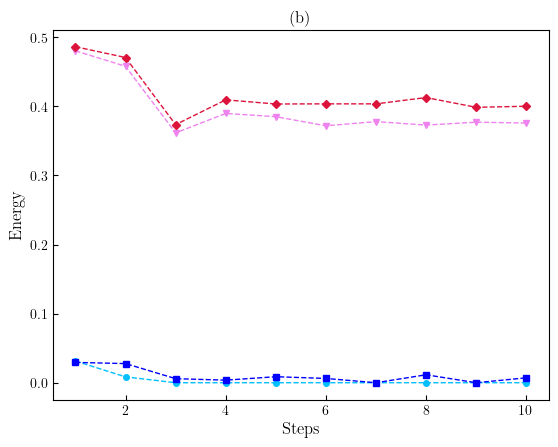

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
plt.rcParams['font.family'] = "serif"
plt.rcParams['text.usetex'] = True
font = {'family': 'serif',
        'weight': 'normal',
        'size': 9,
        }
#font = font_manager.FontProperties(family='serif',style='normal', size=12)

plt.plot(x_axis, Ergotropy_Theory, color='deepskyblue', linestyle='dashed', linewidth = 1,
         marker='o', markerfacecolor='deepskyblue', markersize=4, label = "Unconditional Ergotropy - Theory")
         
plt.plot(x_axis, Ergotropy_Im  , color='blue', linestyle='dashed', linewidth = 1,
         marker='s', markerfacecolor='blue', markersize=4, label = "Unconditional Ergotropy - IBM-Sherbrooke")

plt.plot(x_axis, Daemonic_Theory, color='violet', linestyle='dashed', linewidth = 1,
         marker= "v", markerfacecolor='violet', markersize=4,  label = "Daemonic Ergotropy - Theory")

plt.plot(x_axis, Daemonic_Im, color='crimson', linestyle='dashed', linewidth = 1,
         marker= "D", markerfacecolor='crimson', markersize=4    ,label = "Daemonic Ergotropy - IBM-Sherbrooke") 

plt.xlabel('Steps', fontdict=font, fontsize=12)
plt.ylabel('Energy', fontdict=font, fontsize=12)
plt.title(f'(b)', fontdict=font,fontsize=12 )
plt.tick_params(direction = 'in', which = 'both') 
plt.tick_params(which='minor', length=4, color='r')
ax = plt.subplot(111)
box = ax.get_position()
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

 #Put a legend to the right of the current axis
#ax.legend(prop = font)
plt.savefig('Plot2legend.pdf',format="pdf",  dpi = 600,  bbox_inches='tight')
plt.show()


In [ ]:
Ergotropy_Im 

[0.02939999999999998,
 0.027699999999999947,
 0.005900000000000016,
 0.0037000000000000366,
 0.008699999999999986,
 0.006199999999999983,
 0,
 0.011499999999999955,
 0,
 0.00709999999999994]

In [ ]:
Daemonic_Im  

[0.48640000000000005,
 0.4708,
 0.37360000000000004,
 0.4095000000000001,
 0.40349999999999997,
 0.40369999999999995,
 0.40370000000000006,
 0.41279999999999994,
 0.39870000000000005,
 0.4002]

In [ ]:
Energy_Im 

[0.5161,
 0.5186,
 0.42510000000000003,
 0.46930000000000005,
 0.4628,
 0.4608,
 0.46140000000000003,
 0.4669,
 0.4554,
 0.45709999999999995]